In [1]:
import glob
import numpy as np
import xarray as xr
import fuvpy as fuv
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning) # Turn of all the warnings when np.where contains NaNs.

In [2]:
path = '../sample_wicfiles/'
wicfiles = glob.glob(path + '*.idl')
wic = fuv.read_idl(wicfiles,dzalim=75)
wic = wic.fuv.backgroundmodel_BS(tOrder=0).fuv.backgroundmodel_SH(3,3,tOrder=0)

In [3]:
bi = fuv.detect_boundaries(wic)

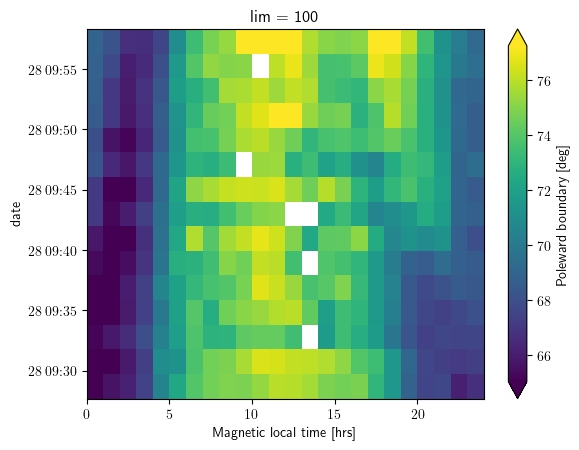

In [4]:
bi['pb'].sel(lim=100).plot(robust=True)

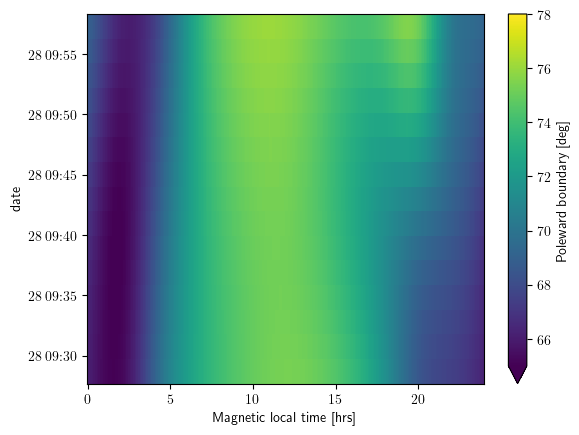

In [5]:
bmBS = fuv.boundarymodel_BS(bi,tLeb=1,tLpb=1)
bmBS['pb'].plot(vmin=65,vmax=78)

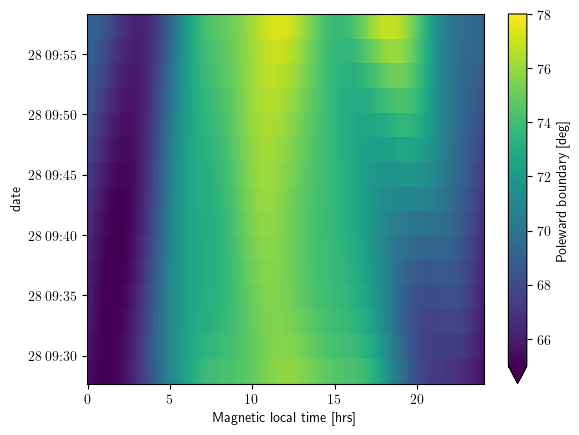

In [6]:
bmF = fuv.boundarymodel_F(bi,tLeb=1e2,tLpb=1e2)
bmF['pb'].plot(vmin=65,vmax=78)

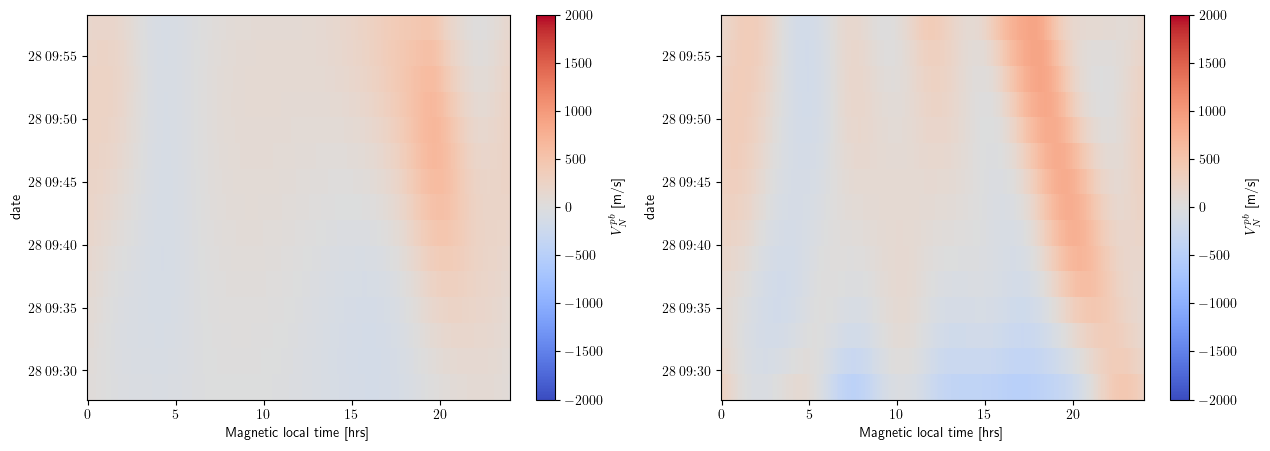

In [7]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
bmBS['vn_pb'].plot(ax=axs[0],vmin=-2000,vmax=2000,cmap='coolwarm')
bmF['vn_pb'].plot(ax=axs[1],vmin=-2000,vmax=2000,cmap='coolwarm')